# `Inside the Offshores leak`
`Panama Papers as you have never seen it`

# Attention please, refer to the online version of the [notebook viewer](https://nbviewer.jupyter.org/github/puccife/ADAHomeworks/blob/master/project/notebook_milestone_3.ipynb)
### Updated 19 Dec 2017

### Importing libs

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgetsimport
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from utils import visualizer, preprocessing, visualizers_1, preprocessing_1,computations_1, visualizer_q3, Network_vis
import sklearn
import json
import folium
import networkx as nx
#from sklearn import preprocessing, decomposition
import igraph as ig
%load_ext autoreload
%autoreload 2
%matplotlib inline
#Import new style
plt.style.use('bmh')

# Extracting data 

In [2]:
# File names path
entities = r'./panama_csv/Entities.csv'
index_2013 = r'./the_index/index2013_data.xls'
index_2014 = r'./the_index/index2014_data.xls'
index_2015 = r'./the_index/index2015_data.xls'
index_2016 = r'./the_index/index2016_data.xls'
index_2017 = r'./the_index/index2017_data.xls'

entities = pd.read_csv(entities, header=0, low_memory=False)
#entities_c = entities.copy()

index_2013 = pd.read_excel(index_2013,index_col = 'Country Name',header=0)
index_2014 = pd.read_excel(index_2014,index_col = 'Country Name',header=0)
index_2015 = pd.read_excel(index_2015,index_col = 'Country Name',header=0)
index_2016 = pd.read_excel(index_2016,index_col = 'Country Name',header=0)
index_2017 = pd.read_excel(index_2017,index_col = 'Country Name',header=0)

## Explaining the data:

<h1><center>**~~ Panama Papers ~~**</center></h1>

**Introduction: ** 

This database contains information on almost 500,000 offshore entities that are part of the Panama Papers, the Offshore Leaks and the Bahamas Leaks investigations. The data covers nearly 40 years – from 1977 through to early 2016 – and links to people and companies in more than 200 countries and territories. The real value of the database is that it strips away the secrecy that cloaks companies and trusts incorporated in tax havens and exposes the people behind them. This includes, when available, the names of the real owners of those opaque structures.

The dataset is divided into 5 **main** csv files :
* Addresses
* Edges
* Entities
* Intermediaries
* Officers

In this project we are focusing on the relationships between the countries involved.Briefly here is the list of our research questions.

1. How the number of offshores that are founded from an origin country in tax havens is related to economical factors of the origin country? Which roles does the legal situation in the origin country play compared to the legal situation in the offshore country?
3. How are the countries connected? Is there a pattern in the way players in origin counrties select special countries for their offshores.
4. There is a hypothesis that scandals involving tax havens actually help to promote creating offshores there. Can we find evidence for this in the data?

To look through those questions into more details, we use the **csv** file named **Entities** which contains the connections between the origin and tax haven countries and use the help of the dataset **Index Of Economics Freedom** to understand the economical/legal parameters of each country.

Here is a brief description of the columns used from the **Entities** csv file.

* **Node_id:** A unique node id for each set of data. 
* **Country:** The country where the offshore entity was created from.
* **Jurisdiction:** The country that has official power to make legal decisions and judgements. Interpreted here as the Tax Haven countries.
* **Incorporation Date:** The date when an offshore entity was created.
* **Inactivation Date:** The date when a client told the agent to deactivate the offshore entity, which could be reactivated at a later date.
* **Struck off date:**  A company becomes struck off when it fails to be in good standing, which happens when it fails to pay license fees. In the offshore world this is the equivalent to closing an entity, although it can be reactivated at a later date if the fees start being paid again.

Other columns such as name of the company, service provider, addresses are available but they are of no use to us and since we are investigating the leak at a country level, we are not in need to use the other files.

<h1><center>**~~ Index Of Economics Freedom ~~**</center></h1>

**Introduction:**

Economic freedom is the fundamental right of every human to control his or her own labor and property. In an economically free society, individuals are free to work, produce, consume, and invest in any way they please. In economically free societies, governments allow labor, capital, and goods to move freely, and refrain from coercion or constraint of liberty beyond the extent necessary to protect and maintain liberty itself. The Index covers 12 economic freedoms, objective measurements, historical background, and policy analysis of 186 economies troughout the world. The 12 economic freedoms are grouped into four pillars of economic freedom:

**1. Rule of law:**

 * **Property rights:** is an assessment of the ability of individuals to accumulate private property, secured by clear laws that are fully enforced by the state. It measures the degree to which a country’s laws protect private property rights and the degree to which its government enforces those laws.
 * **Government integrity:** "Corruption" is the abuse of entrusted power for private gain. It can be classified as grand, petty and political, depending on the amounts of money lost and the sector where it occurs.
 * **Judicial effectiveness:** Well-functioning civil justice systems protect the rights of all citizens against infringement of the law by others, including powerful parties and governments. An essential component of the rule of law is indeed based on effective and fair judicial systems to ensure that the laws are respected and appropriate sanctions are taken when they are violated.
 
**2. Government Size:**

 * **Government spending:** Considers the level of government expenditures as a percentage of GDP. General government expenditure data include all levels of government such as federal, state, and local. Research have shown that excessive government spending that causes chronic budget deficits and the accumulation of sovereign debt is one of the most serious drags on economic dynamism.
 * **Tax burden:** is a measure of the tax burden imposed by government. It includes direct taxes, in terms of the top marginal tax rates on individual and corporate incomes, and overall taxes, including all forms of direct and indirect taxation at all levels of government, as a percentage of GDP.
 * **Fiscal health:** A government’s budget is one of the clearest indicators of the extent to which it respects the principle of limited government. Widening deficits and a growing debt burden, both of which are direct consequences of poor government budget management, lead to the erosion of a country’s overall fiscal health.
 
**3. Regulatory Efficiency:**

 * **Business freedom:**  is an overall indicator of the efficiency of government regulation of business. Individual’s ability to establish and run an enterprise without undue interference from the state is one of the most fundamental indicators. It is formed from several factors:
   * Starting a business [ Procedure / Time / Cost / Minimum capital ]
   * Obtaining a license [ Procedure / Time / Cost ]
   * Closing a business [ Time / Cost / Recovery rate ]
 * **Labor freedom:**  is a quantitative measure that considers various aspects of the legal and regulatory framework of a country’s labor market, including regulations concerning minimum wages, laws inhibiting layoffs, severance requirements, and measurable regulatory restraints on hiring and hours worked.
 * **Monetary freedom:**  combines a measure of price stability with an assessment of price controls. Both inflation and price controls distort market activity. Price stability without microeconomic intervention is the ideal state for the free market.
 
**4. Open Markets:**

 * **Trade freedom:**  is a composite measure of the absence of tariff and non-tariff barriers that affect imports and exports of goods and services.The trade freedom score is based on two inputs:
   * The trade-weighted average tariff rate.
   * Non-tariff barriers (NTBs). The categories considered are:
     * Quantity restrictions.
     * Price restrictions.
     * Regulatory restrictions.
     * Customs restrictions.
     * Investment restrictions.
     * Direct government intervention.
 * **Investment freedom:** Describes the constraints on the flow of investment capital. Individuals and firms would be allowed to move their resources into and out of specific activities, both internally and across the country’s borders, without restriction. Countries have different rules for foreign and domestic investment; some restrict access to foreign exchange; some impose restrictions on payments, transfers, and capital transactions; in some, certain industries are closed to foreign investment. Labor regulations, corruption, red tape, weak infrastructure, and political and security conditions can also affect the freedom that investors have in a market.
 * **Financial freedom:** is a measure of banking efficiency as well as a measure of independence from government control and interference in the financial sector. It is calculated by looking at those broad areas:
   * The extent of government regulation of financial services.
   * The degree of state intervention in banks and other financial firms through direct and indirect ownership.
   * The extent of financial and capital market development.
   * Government influence on the allocation of credit.
   * Openness to foreign competition.
   
**5. Monetary measure:**
 * **Gross Domestic Product (GDP):** is a monetary measure of the market value of all final goods and services produced in a period of time.
 * **GDP growth rate:** measures how fast the economy is growing. It does this by comparing one year of the country's gross domestic product to the previous year.
 * **GDP per Capita:** is the GDP of a year divided by the average population of the same year.
 * **Government Expenditure:**  refers to the purchase of goods and services, which include public consumption and public investment, and transfer payments consisting of income transfers and capital transfer.
 * **Inflation:** is the rate at which the general level of prices for goods and services is rising and, consequently, the purchasing power of currency is falling.
 * **Foreign Direct Investment Inflow:** the value of inward direct investment made by non-resident investors in the reporting economy.
 * **Public Debt:** is how much a government owes to creditors outside of itself.

# Research Question 1

> Which economic factors motivate the foundation of offshore companies? Which role does the legal situation in the origin country play compared to the legal situation in the offshore country?

##### As shown above, the features of the index of economical freedom are divided into 5 categories.


In [3]:
# Dividing the columns into their corresponding categories.
open_markets_data = ['Trade Freedom','Investment Freedom ','Financial Freedom']
regulatory_efficiency_data = ['Business Freedom','Labor Freedom','Monetary Freedom']
rule_of_law_data = ['Property Rights','Government Integrity','Judical Effectiveness']
government_size_data = ['Gov\'t Spending','Fiscal Health','Tax Burden']
economical_data = ['GDP (Billions, PPP)','GDP Growth Rate (%)','GDP per Capita (PPP)'\
                   ,'Gov\'t Expenditure % of GDP ','Inflation (%)',\
                   'FDI Inflow (Millions)','Public Debt (% of GDP)']
# Years.
years = ['2017', '2016', '2015', '2014','2013']

##### Rough idea of how the entities file is distributed.

In [4]:
entities.head(3)

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers


In [5]:
print("The number of rows / entities we have in our data is {}.".format(len(entities)))
print("The number of unique countries involved is {}.".format(len(entities.countries.unique())))
print("The number of unique Tax havens / jurisdictions is {}.".format(len(entities.jurisdiction_description.unique())))
print("Is Node_ID unique? {}.".format(entities.node_id.is_unique))

The number of rows / entities we have in our data is 495038.
The number of unique countries involved is 519.
The number of unique Tax havens / jurisdictions is 40.
Is Node_ID unique? True.


You may find it weird that the number of countries involved is 519 while the total number of countries in the world is 195. This is due to the fact that there are many fields where the data is not ideal in addition to the presence of cities/states instead of countries. This will be discussed further on in this notebook.

### Cleaning the datasets and concatenating them into a single dataframe.

In [6]:
# Cleaning process.
index_2013 = preprocessing_1.cleaning_index_data(index_2013,'2012')
index_2014 = preprocessing_1.cleaning_index_data(index_2014,'2013')
index_2015 = preprocessing_1.cleaning_index_data(index_2015,'2014')
index_2016 = preprocessing_1.cleaning_index_data(index_2016,'2015')
index_2017 = preprocessing_1.cleaning_index_data(index_2017,'2016')
# Concatenating all the datasets.
economical_indexes = pd.concat([index_2017,index_2016,index_2015,index_2014,index_2013])

In [7]:
# Filtering the data with 2 thresholds, 500 for the number of entities in an offshore
# and 500 for the number of entities coming from a certain country.
jurisdiction_country = computations_1.jurisdiction_country_data(entities,500,500,0)
# Getting all the data and getting rid of the NaN values.
jurisdiction_count = computations_1.jurisdiction_country_data(entities,0,0,0)
# Getting all the data avialable with the NaN values for further comparison.
total_jurisdiction_count = computations_1.jurisdiction_country_data(entities,0,0,1)

### Visualizing the number of entities in a tax haven.

In here we will visualize the total number of offshore accounts opened in the Tax haven countries including the ones where the origin country is missing. The goal is to visualize the total number of accounts created regardless if the origin country data is present. A threshold cap of 500 was set to the tax haven countries entity count to be able to visualize the data.


### Data with missing information.

In [8]:
visualizers_1.visualize_jurisdiction_countly(total_jurisdiction_count.copy())

### Data without missing information.

In [9]:
visualizers_1.visualize_jurisdiction_countly(jurisdiction_count.copy())

### Comparing both plots

In [10]:
visualizers_1.visualize_jurisdiction_countly_mixed(jurisdiction_count.copy(), total_jurisdiction_count.copy())

Above are 3 plots describing the number of entities opened throughout the years in  the tax havens " jurisdictions ". The first thing that caught our attention is the amount of missing data, in particular, the entities without a registered origin in the Bahamas. Despite the loss of information, this shows that the Bahamas is a country of special interest and worth
being investigated.
Looking at the tax havens we can see a strong presence of British overseas territories and Crown
Dependencies such as British Virgin Islands, Cayman Islands, and British Anguilla, alongside British Commonwealth territories like the Bahamas and Cook Islands. Most of the countries heavily involved
in the scheme have some sort of financial secrecy. A detailed look into countries according to their secrecy and the scale of their offshore financial activities can be found in the [Financial Secrecy Index](http://www.financialsecrecyindex.com/introduction/fsi-2015-results).

### Countries involved
In here we will visualize the total number of offshore entities opened by each country in the dataset.

In [11]:
visualizers_1.visualize_country_count(jurisdiction_count.copy())

Now looking at the number of entities opened from origin countries, we can see the prescence of a 
significant number of tax havens. Those were interpreted as entities that were terminated then
re-established again at a certain period of time in the same country, or a movement of entities
from one haven to another.

### Countries most involved in opening offshore accounts.
 From the visualization above we can extract the countries that are in our opinion worth investigating.

### Visualizing distribution of entities in a country.

In [12]:
countries = ['Bahamas','Cyprus','Isle of Man','Jersey','Luxembourg','Panama',\
             'Russia','Switzerland','Taiwan','United Arab Emirates','United Kingdom',\
            'United States','Hong Kong','British Virgin Islands','Guernsey','Singapore',\
            'China','Liechtenstein','Uruguay','Latvia','Monaco','Gibraltar']

In [13]:
visualizers_1.visualize_specific_count_2(countries,jurisdiction_country)

We can see as the number of offshore entities increase in a country, the number of tax havens involved increases. Of course this is only a small portion of the data available in the real world but it can be seen that most of the countries invest in Panama and British Virgin Islands. It would have been truly interesting to see the true distribution of the entities registered in Bahamas. Although [Paradise papers](https://www.icij.org/investigations/paradise-papers/icij-releases-paradise-papers-data-appleby/) were not analyzed, it is worth to note that more than 70 percent of the new records belong to entities incorporated in Bermuda and the Cayman Islands.

We have 40 countries in our dataset which have more than 500 offshore entities associated to them.

From those we will investigate the top 5.
Most important countries to be investigated:
* Switzerland
* Hong Kong 
* United Kingdom
* United Arab Emirates
* Luxembourg

In the index of economic freedom, there is no data about any of the british overseas territories [British Virgin islands, Cayman Islands, isle of Man, British Anguilla, Bermuda ] , where most of those territories are considered Tax Havens. Looking throughout the web too, there is no mention of any economical data about those territories which says a lot about the level of secrecy they acquire as mentioned before.

### Comparing several economical factors between the most involved countries

## Extracting information from Economic Index based on column name

In [14]:
# Top countries involved.
lead_countries=['Switzerland','Hong Kong','United Kingdom','United Arab Emirates','Luxembourg']
# Tax havens that we have data about in the economics index with most number of offshore entities.
# Write why we don't have about others ?
haven_countries = ['Panama','Bahamas','Samoa','Seychelles']
# Both top countries and Tax Havens.
both_countries = ['Switzerland','Hong Kong','United Kingdom','United Arab Emirates','Luxembourg','Panama','Bahamas','Samoa','Seychelles']

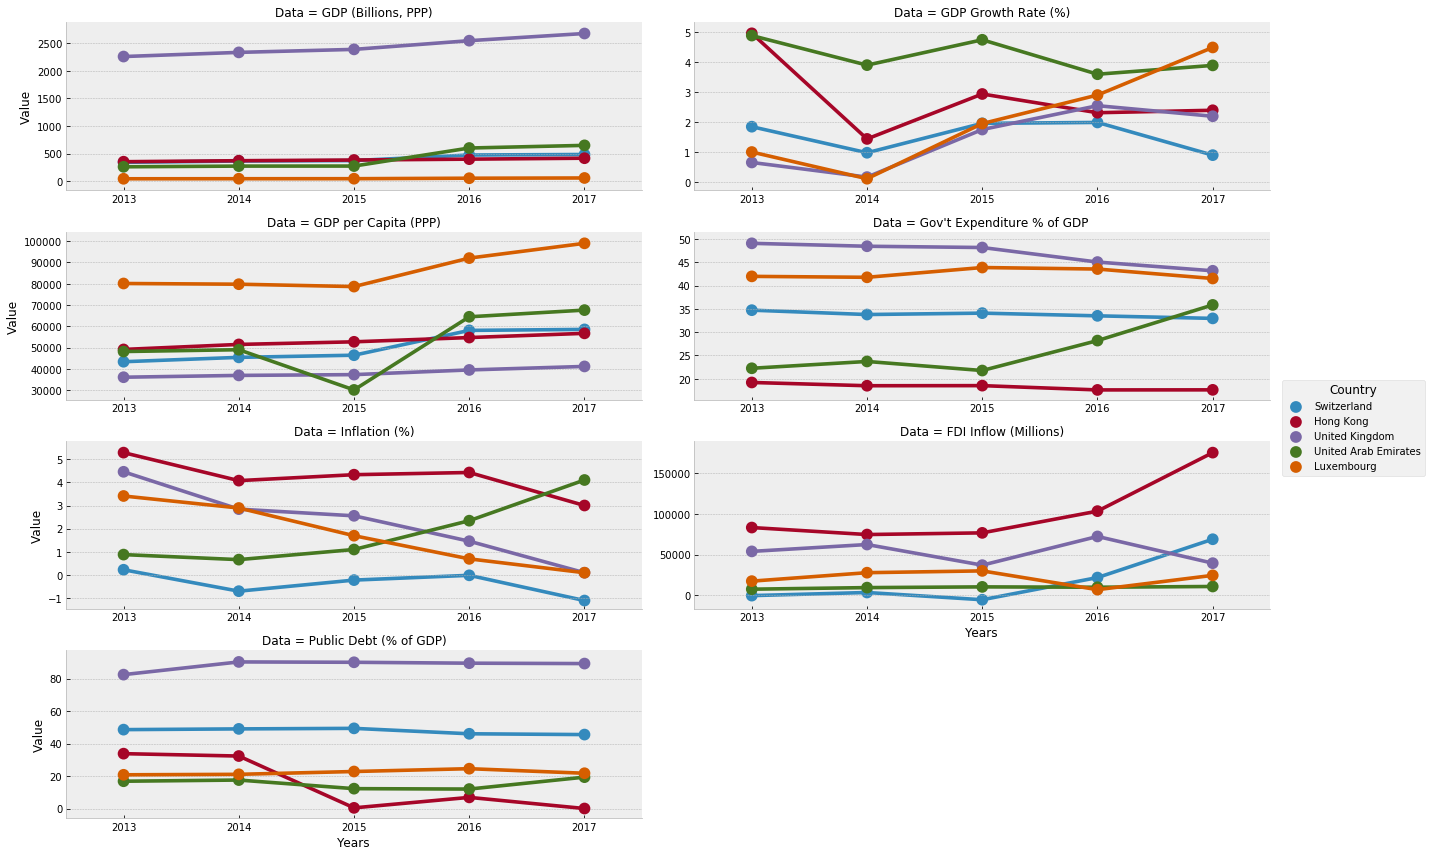

In [15]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,economical_data,years)

**Analyzing the data above we can see that:**
* The UK leads the GDP by a huge gap, but at the same time has the highest public debt.
* The rest of the countries compare similarly w.r.t. the GDP.
* Taking a closer look at the GDP per capita which can be a much better indicator than the GDP since it's divided by the population number, we can see that the UK performs the worst ( given that it had a much bigger GDP ) and Luxembourg leads the graph with stunning values.
* Apart form the U.A.E ( increasing ) we can see constant decrease / stable inflation rate in the other countries, indicating a healthy economy.
* The most interesting is the Foreign direct investment inflow, where we can see a significant amount of money being pumped into Hong Kong, Switzerland, and the UK.

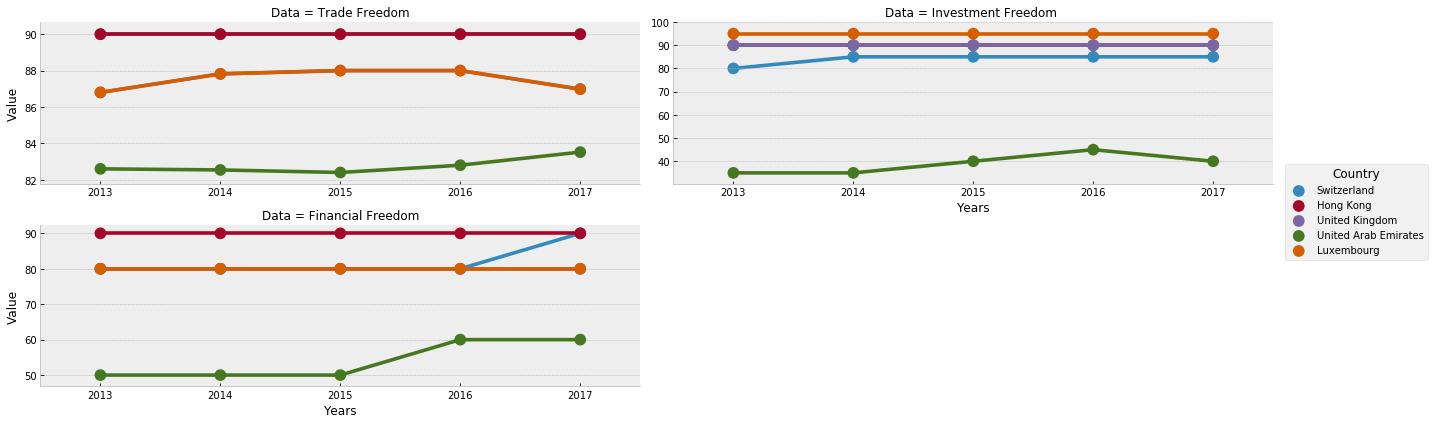

In [16]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,open_markets_data,years)

**Analyzing the data above we can see that:**
* Apart from the U.A.E , all of them share rather a similar trade, investment, financial freedom scores.
* We can also see that Hong Kong leads all 3 parameters.

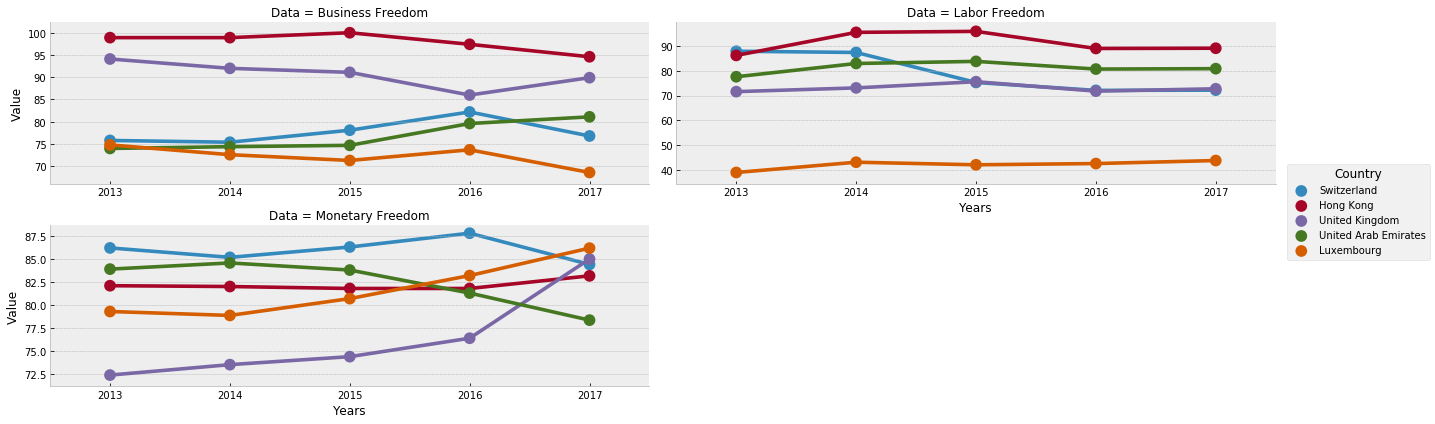

In [17]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,regulatory_efficiency_data,years)

**Analyzing the data above we can see that:**
* There is quite a diverse distribution of the data in the regulatory efficiency data but within an acceptable range.
* Hong kong also leads 2 out of the 3 parameters.
* United Kingdom shows a vast improvement from 2013 to 2017.
* Surprisingly low score for Luxembourg in labor freedom.

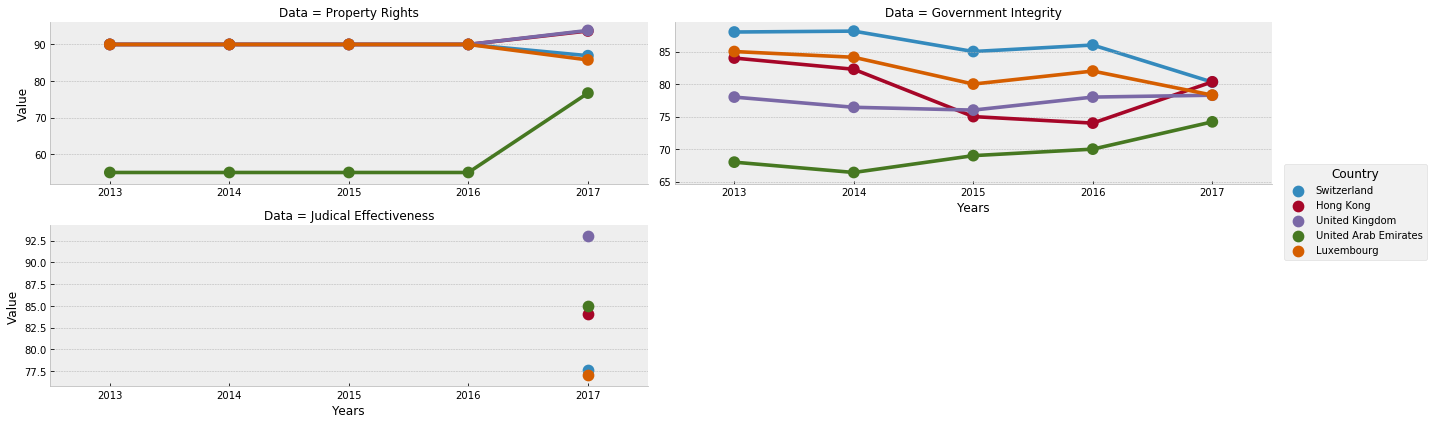

In [18]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,rule_of_law_data,years)

**Analyzing the data above we can see that:**
* Apart from the U.A.E which improved significantly from 2016 to 2017, all the other countries share the same score for property rights.
* Slight fluctuations of Government integrity score throughout the years.

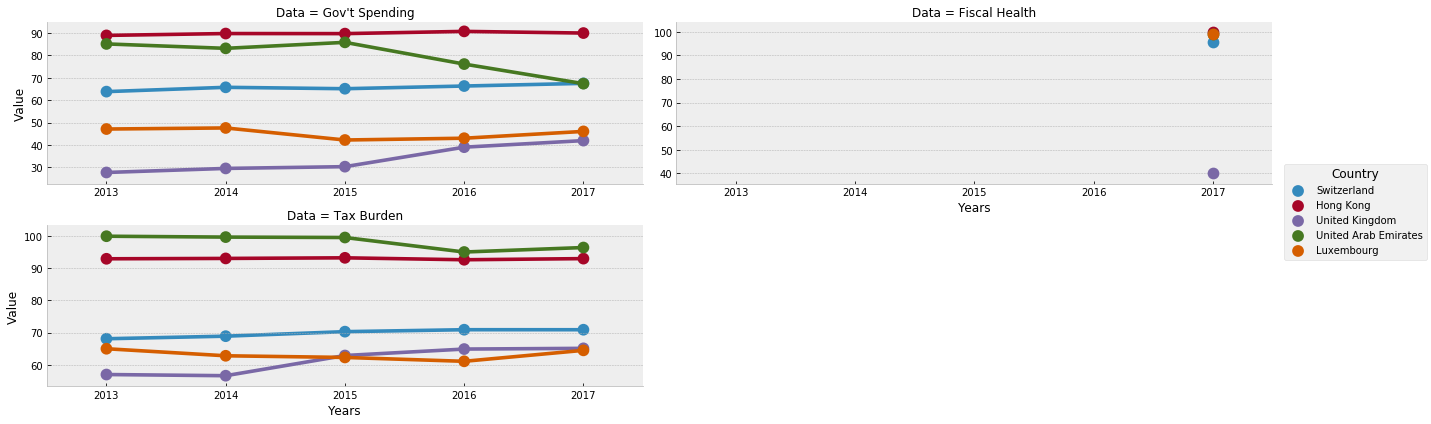

In [19]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,government_size_data,years)

**Analyzing the data above we can see that:**
* We can see apart from fiscal health, there is a wide variety in the distribution in the Tax burden and Government spending score for each country.

We can clearly see that most of the top 12 origin countries ( with respect to entity count ) ( colored grey ) are on the left-side of the x-axis and close to each other. This indicates that those countries indeed have similar economical factors. It is necessary to note that not ONLY the countries with great economic standing are the ones that invest the most, but also the ones with mediocre overall economy have a great contribution. However, this may be due to the fact that this data only points to a fraction of what really is out there.

### Visualizing the correlation of features between all the countries.


In [20]:
countries_involved_data = computations_1.features_df(jurisdiction_count,index_2017)

In [21]:
visualizers_1.visualize_feature_correlation(countries_involved_data,open_markets_data)

                     Trade Freedom  Investment Freedom   Financial Freedom  \
Trade Freedom             1.000000             0.618908           0.655771   
Investment Freedom        0.618908             1.000000           0.801356   
Financial Freedom         0.655771             0.801356           1.000000   
Score                     0.632492             0.672084           0.698514   
Count                     0.151255             0.189763           0.277119   

                        Score     Count  
Trade Freedom        0.632492  0.151255  
Investment Freedom   0.672084  0.189763  
Financial Freedom    0.698514  0.277119  
Score                1.000000  0.251203  
Count                0.251203  1.000000  


**Analyzing the correlation between the score and the open market parameters:**
* High correlation between score all the open market parameters.
* HIgh correlation between Financial and investment freedom.

In [22]:
visualizers_1.visualize_feature_correlation(countries_involved_data,regulatory_efficiency_data)

                  Business Freedom  Labor Freedom  Monetary Freedom     Score  \
Business Freedom          1.000000       0.538395          0.258853  0.504743   
Labor Freedom             0.538395       1.000000          0.172669  0.403542   
Monetary Freedom          0.258853       0.172669          1.000000  0.738516   
Score                     0.504743       0.403542          0.738516  1.000000   
Count                     0.236401       0.207600          0.090884  0.251203   

                     Count  
Business Freedom  0.236401  
Labor Freedom     0.207600  
Monetary Freedom  0.090884  
Score             0.251203  
Count             1.000000  


**Analyzing the correlation between the score and the regulatory efficiency parameters:**
* High correlation between score with business and monetary freedom.

In [23]:
visualizers_1.visualize_feature_correlation(countries_involved_data,rule_of_law_data)

                       Property Rights  Government Integrity  \
Property Rights               1.000000              0.889064   
Government Integrity          0.889064              1.000000   
Judical Effectiveness         0.857476              0.851663   
Score                         0.777546              0.713405   
Count                         0.269892              0.269292   

                       Judical Effectiveness     Score     Count  
Property Rights                     0.857476  0.777546  0.269892  
Government Integrity                0.851663  0.713405  0.269292  
Judical Effectiveness               1.000000  0.718680  0.222102  
Score                               0.718680  1.000000  0.251203  
Count                               0.222102  0.251203  1.000000  


**Analyzing the correlation between the score and the rule of law parameters:**
* The highest correlations between all features are found in the rule of law parameters, specifically the property rights and the government integrity.


In [24]:
visualizers_1.visualize_feature_correlation(countries_involved_data,government_size_data)

                Gov't Spending  Fiscal Health  Tax Burden     Score     Count
Gov't Spending        1.000000       0.195839    0.483942  0.183569  0.103593
Fiscal Health         0.195839       1.000000    0.227995  0.543873  0.152545
Tax Burden            0.483942       0.227995    1.000000  0.405818  0.069668
Score                 0.183569       0.543873    0.405818  1.000000  0.251203
Count                 0.103593       0.152545    0.069668  0.251203  1.000000


**Analyzing the correlation between the score and the rule of law parameters:**
* From the graphs we saw earlier we noticed that there were a lot of fluctuations in the parameters of the government size and we can clearly see that there is very low correlation between the score with tax burden and government spending. Moderate correlation between the score and fiscal health.

#### Note about the count correlation with other features

We can clearly see that there is a low correlation between the total number of entities in a country with the other economic parameters, this is due to the fact that there are countries with a good economic standing such as Germany, Netherlands, and France for example with a low number of entities registered to them, and the other way around, countries with lower economic standing with a high number of entities registered and so we couldn't tell exactly which economic factors are of great importance.

On the other hand, you will find below a PCA plot on the economical features that shows how the top 12 **involved** countries are distributed among the rest.

### PCA on involved countries

In [25]:
visualizers_1.visualize_pca_top_countries(index_2017,jurisdiction_count)

# Research Question 2

> How are the countries connected? Is there a pattern in the
way players in origin countries select special countries for
their offshores?

*For every combination of two countries that occur in the data
we count the number of offshores founded in one country
coming from the other country and vice versa.*

## Reading the data

In [26]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country'})

## Cleaning the data

A closer inspection of the data revealed that there are missing values encoded by 'Not identified', 'Undetermined', and 'Recorded in leaked files as "fund"'. We convert them to NaN. Furthermore, we observed occurences of 'United States Of America' as well as 'United States'. in order to have consistent names we rename them all to 'United States'.

In [27]:
# reencode missing values
entities.Country.replace('Not identified',np.NaN, inplace=True)
entities.jurisdiction_description.replace(['Undetermined', 'Recorded in leaked files as "fund"'],np.NaN, inplace=True)
# consistent naming
entities.jurisdiction_description.replace('United States Of America','United States', inplace=True)

## Computing the cross table of frequencies 

As mentionned above, we want to count for every combination of two countries that occur in the data the number of offshores founded in one country coming from the other country and vice versa.
The frequencies of relations can be computed using the pandas function `crosstab`.

In [28]:
crosstable = pd.crosstab(entities.Country, [entities.jurisdiction_description], rownames=['origin'], colnames=['destination'])
crosstable.tail()

destination,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,Costa Rica,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
origin,,,,,,,,,,,,,,,,,,,,,
Viet Nam,2,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Viet Nam;British Virgin Islands,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimbabwe,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A closer observation of the country names shows that some offshore entities have more than one origin country. The countries are specified in one data row and the names are seperated by ';', see for example the origin value 'Viet Nam;British Virgin Islands'. For the analysis of the relations between origin and goal countries we decided to count such relations for all of the specified origin countries.

Therefore, we refactor the crosstable by duplicating the rows with several origin countries once for every origin country. As this might result in having more than one row per origin country, in the end we group by origin country and sum up all the values. Furthermore, we again drop the row corresponding to the country value 'Not identified'.

Furthermore, in a seperate analysis we investigate which countries occur together as origin countries.

In [29]:
#duplicating the rows
multiple_orig = pd.DataFrame(columns = crosstable.reset_index().columns)
for index, row in crosstable.reset_index().iterrows():
    for orig in row['origin'].split(';'):
        multiple_orig = multiple_orig.append(pd.concat([pd.Series({'origin' : orig}), row[1:]]), ignore_index=True)
multiple_orig.head()

destination,origin,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
0,Albania,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Andorra,26,0,0,0,39,0,0,0,0,...,9,72,0,0,0,1,0,15,0,0
3,Angola,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anguilla,0,0,0,21,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#sum up values for each country
crosstable = multiple_orig.groupby('origin').sum()
crosstable = crosstable.drop('Not identified')

In [31]:
crosstable.to_csv('crosstable.csv')

For the further analysis we consider not absolute frequencies but the relative frequencies of destination countries for every origin country. Hence, we perform a row wise normailzation.

In [32]:
#row wise normalization
crosstable_norm = crosstable.div(crosstable.sum(axis=1), axis=0)

## 2.1. Relations between origin and goal countries

In order to be able to find a pattern in the
way players in origin countries select special countries for
their offshores, we cluster the origin countries into groups with similar selection data. The clustering is performed using KMeans with a k-means++ initialization and a maximum of 300 iterations. The number of clusters is determined as the number with the maximal average silhouette. We set the maximal number of clusters for the comparison to 10. It turns out that the optimal number of clusters is 4.

In [33]:
from sklearn.cluster import KMeans

def compute_clusters(crosstable_norm):
    max_n_clusters = 10
    scores = []
    clusters = []
    # try for nr of clusters up to specified max and chose clustering with optimal silhouette
    for n_clusters in range(2, max_n_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(crosstable_norm)
        clusters.append(kmeans.labels_)
        scores.append(sklearn.metrics.silhouette_score(crosstable_norm, kmeans.labels_))

    n_clusters = np.argmax(scores)
    crosstable_norm['cluster'] = clusters[n_clusters]

    return n_clusters + 2

In [34]:
n_clusters = compute_clusters(crosstable_norm)

In [35]:
n_clusters

4

In the following plot we visualize for each of the four resulting clusters the relative frequencies for the corresponding countries. It becomes apparent that the first cluster contains those countries where the majority of offshore entities are founded on the British Virgin Islands. The second cluster contains the countries with most offshore entities in Panama, the third those countries with a mojority of entities on the Seychelles. The countries in the fourth cluster show more diverse distributions of destination countries. We observe that for many countries in this cluster the main destination of entities is the country itself, see for example the Cook Islands or Samoa.

In [36]:
#plot frequencies for each cluster
for i in range(n_clusters):
    visualizer_q3.plot_cross_table_plotly(crosstable_norm[crosstable_norm.cluster == i].drop('cluster', axis=1))

In order to better understand the underlying structures that lead to those patterns of selection of destination countries, we want to find similarities of the countries which are in the same cluster. The first thing we consider is geographical closeness. Therefore we display a map where countries in the same cluster have the same color. Form the map it becomes apparent most South American countries (Brasil being the most apparent exception) have the majority of offshore entities in Panama (cluster 2). In Northern America and the UK, most offshore entities are founded on the British Virgin Islands.

In [37]:
# information that is needed for the map
cluster_info = crosstable_norm.reset_index()[['origin', 'cluster']]

In [38]:
cluster_info.head()

destination,origin,cluster
0,Albania,3
1,American Samoa,3
2,Andorra,1
3,Angola,0
4,Anguilla,3


In [39]:
# load information about countries in the world
world_topojson_path = r'json/world-countries.json'
world_topojson = json.load(open(world_topojson_path))
url = 'https://restcountries.eu/rest/v2/'
restcountries, nametoid = visualizer_q3.buildJsonAPI(url)

Republic of Kosovo has problem with numeric code None


In [40]:
# fix naming problems
nametoid['Bolivia'] = 68
nametoid['British Virgin Islands'] = 92
nametoid['Brunei'] = 96
nametoid['Iran'] = 368
nametoid['Macedonia'] = 807
nametoid['Moldova'] = 498
nametoid['Russia'] = 643
nametoid['South Korea'] = 410
nametoid['Syria'] = 760
nametoid['Tanzania'] = 834
nametoid['U.S. Virgin Islands'] = 850
nametoid['United Kingdom'] = 826
nametoid['United States'] = 840
nametoid['Venezuela'] = 862

In [41]:
#add ids to countries in order to match them with topojson data
cluster_info['id'] = cluster_info.origin.apply(lambda x: restcountries[nametoid[x]]['alpha3Code'])

In [42]:
cluster_info.head()

destination,origin,cluster,id
0,Albania,3,ALB
1,American Samoa,3,ASM
2,Andorra,1,AND
3,Angola,0,AGO
4,Anguilla,3,AIA


In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [44]:
# create map
#m = folium.Map([46.8,8], 
               #tiles='cartodbpositron', 
               #zoom_start=1)

In [45]:
# add the chororpleth and dispay map
#visualizer_q3.addChoropleth(cluster_info, m, 'cluster','Cluster', 'id','YlGnBu', world_topojson,'objects.countries1')
#m

In [46]:
#display map
from IPython.display import IFrame
IFrame("https://plot.ly/~puccife/47.embed?link=false", width=700, height=350)

We want to find further reasons for those patterns by considering economic background information. We check whether there is a relationship between the economic factors specified in the Index of Eonomic freedom data set and the cluster of a country. To this means we first merge the two datasets.

In [47]:
#merge with economic index
index_2017 = r'./the_index/index2017_data.xls'
index_2017 = pd.read_excel(index_2017,index_col = 'Country Name',header=0)

In [48]:
# Cleaning process.
index_2017 = preprocessing_1.cleaning_index_data(index_2017,'2016')
index_2017.replace('n/a', 0, inplace=True)

In [49]:
index_2017.head()

,Region,World Rank,Region Rank,Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
Afghanistan,Asia-Pacific,163,40,48.885716,12.600000,28.400000,27.500000,91.5775,79.877254,97.338404,...,27.106,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
Albania,Europe,65,30,64.353003,54.013250,28.473312,39.707367,86.8904,72.499704,51.540942,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
Algeria,Middle East / North Africa,172,14,46.528581,38.200000,29.631083,31.700000,81.0911,50.955175,19.847749,...,44.444,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
Angola,Sub-Saharan Africa,165,41,48.515521,36.400000,19.800000,12.800000,87.6875,58.649804,70.743538,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
Argentina,Americas,156,26,50.409088,32.449712,39.580063,38.193866,62.6119,54.638703,56.411450,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5


In [50]:
cluster_index = pd.merge(cluster_info, index_2017, left_on='origin', right_index=True)
cluster_index.head()

,origin,cluster,id,Region,World Rank,Region Rank,Score,Property Rights,Judical Effectiveness,Government Integrity,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Albania,3,ALB,Europe,65,30,64.353003,54.013250,28.473312,39.707367,...,30.038,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
3,Angola,0,AGO,Sub-Saharan Africa,165,41,48.515521,36.400000,19.800000,12.800000,...,28.926,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
6,Argentina,1,ARG,Americas,156,26,50.409088,32.449712,39.580063,38.193866,...,43.947,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5
8,Australia,0,AUS,Asia-Pacific,5,4,81.015797,81.713325,92.942177,74.811725,...,37.249,23.9,1138.1,2.5,2.7,47389.1,6.3,1.5,22264.5,36.8
9,Austria,1,AUT,Europe,30,17,72.265759,86.021044,81.783098,75.246672,...,51.939,8.6,404.3,0.9,1.0,47249.9,5.7,0.8,3837.4,86.2


There are 32 countries for which we cannot find info in index:

In [51]:
len(cluster_index['origin'].unique())

129

In [52]:
len(cluster_info)

161

In [53]:
not_contained = cluster_info.origin[~cluster_info.origin.isin(cluster_index['origin'])].dropna()
display(not_contained)

1                        American Samoa
2                               Andorra
4                              Anguilla
5                   Antigua and Barbuda
7                                 Aruba
18                              Bermuda
22               British Virgin Islands
23                               Brunei
27                       Cayman Islands
33                         Cook Islands
37                              Curaçao
55                            Gibraltar
57                                 Guam
59                             Guernsey
69                          Isle of Man
74                               Jersey
87                                Macao
93                     Marshall Islands
97                               Monaco
102                               Nauru
107                                Niue
117                         Puerto Rico
121               Saint Kitts and Nevis
122                         Saint Lucia
123    Saint Vincent and the Grenadines


In [54]:
len(not_contained)

32

As this is only a small fraction of the countries and it is difficult to find information for the countries that are not in the index, we proceed our analysis with those countries where the data is available. We think that it might still be possible to find unifying factors for the clusters. However, it is important to keep this restriction in mind.

In order to analyze the relationship between the economical factors and the cluster we do a multinomial logit. It predicts the cluster from the economical factors. As economical factors, we considered the gross domestic product (GDP), the GDP growth rate, government expenditures, the infalation, foreign direct investment (FDI) inflow and the public debt. We then interpret the coefficients of the classifier. It turns out that none of the mentionned factors have a significant influence (all p values are bigger than 0.05).

In [55]:
cluster_index = cluster_index.drop('id', 1)

In [56]:
economical_data = ['GDP (Billions, PPP)','GDP Growth Rate (%)','GDP per Capita (PPP)'\
                   ,'Gov\'t Expenditure % of GDP ','Inflation (%)',\
                   'FDI Inflow (Millions)','Public Debt (% of GDP)']

In [58]:
#use statsmodels for logreg in order to get interpretable result
import statsmodels.api as sm
from sklearn import preprocessing as pre

X_df = cluster_index[economical_data]
X = pre.scale(X_df)
X = pd.DataFrame(X, columns=X_df.columns, index = X_df.index)
y = cluster_index['cluster']
logit_model=sm.MNLogit(y,X)
result=logit_model.fit(method='powell', maxiter=100)#epsilon=1e-3)
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.271633
         Iterations: 7
         Function evaluations: 1647
                          MNLogit Regression Results                          
Dep. Variable:                cluster   No. Observations:                  129
Model:                        MNLogit   Df Residuals:                      108
Method:                           MLE   Df Model:                           18
Date:                Tue, 19 Dec 2017   Pseudo R-squ.:               -0.005863
Time:                        20:22:27   Log-Likelihood:                -164.04
converged:                       True   LL-Null:                       -163.08
                                        LLR p-value:                     1.000
                  cluster=1       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
GDP (Billions, PPP)            -0.403

As an alternative approach we also did a PCA and visualized the tree main components. Similarly to the previous analysis, it is difficult to see a pattern:

In [59]:
cluster_country = cluster_info.set_index('origin')
visualizers_1.visualize_pca_clusters(index_2017, cluster_country)

## 2.2. Relations between origin countries

In this section we further analyze which countries occur together as origin countries. After an initial exploration of the data we follow the same steps of analysis as in the previous section.

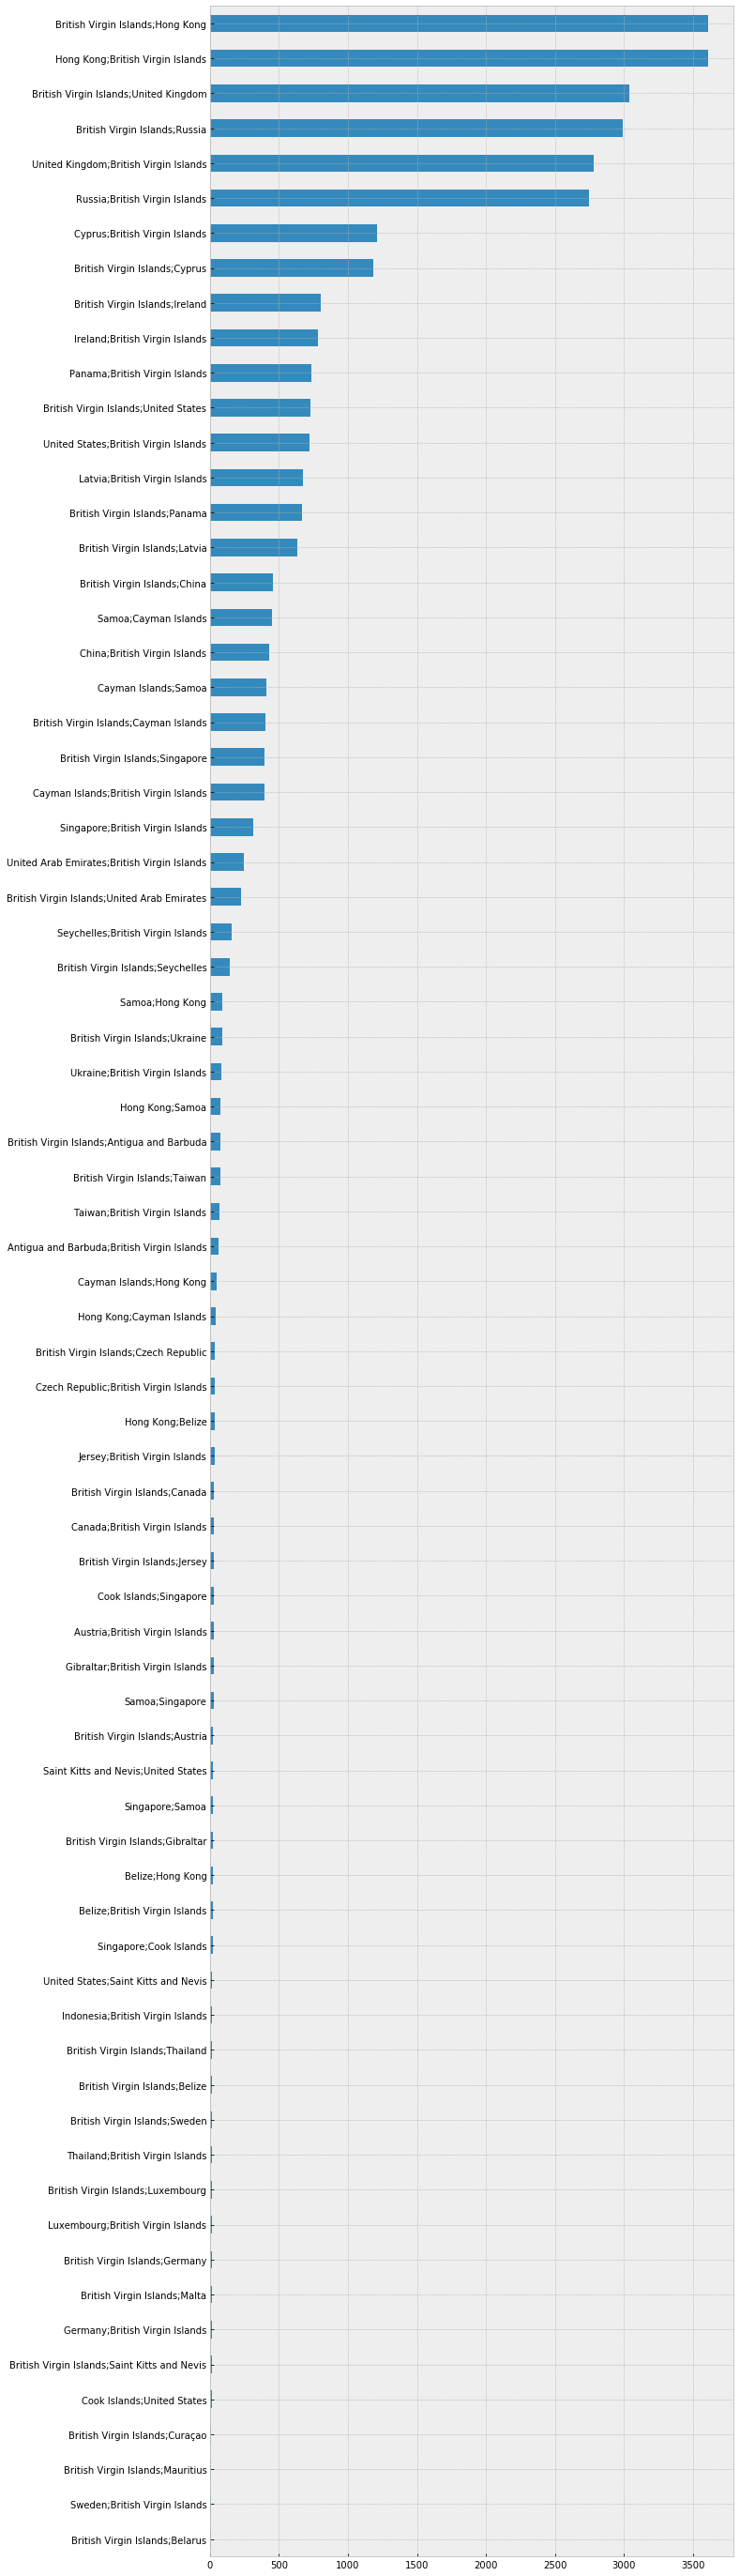

In [60]:
#plot for first superficial analsis
countries = entities.Country.dropna()
counts = countries[countries.str.contains(';') & ~(countries.str.contains('Not identified'))].value_counts()
ax = counts[counts >= 10].plot(kind='barh', figsize=(10, 50))
ax.invert_yaxis()

We observe that if more than one origin country is specified, one of them is very often the British Virgin Islands. We guess this might be due to special legal requirements for founding an entity there.

### Computing the crosstable

In [61]:
#split the strings into the different country names for further analysis
split = pd.DataFrame(entities.Country.dropna()[entities.Country.dropna().str.contains(';')].str.split(';').tolist(), columns = ['origin1','origin2', 'origin3', 'origin4'])#

In [62]:
#get unique values, this will be the rows / cols of the crosstable
vals = split.values.flatten()
vals = np.unique(vals[(vals != np.array(None))])

In [63]:
vals

array(['Andorra', 'Antigua and Barbuda', 'Australia', 'Austria', 'Bahamas',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
       'British Virgin Islands', 'Brunei', 'Canada', 'Cayman Islands',
       'China', 'Cook Islands', 'Costa Rica', 'Croatia', 'Curaçao',
       'Cyprus', 'Czech Republic', 'Estonia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Gibraltar', 'Greece', 'Grenada', 'Guernsey',
       'Hong Kong', 'India', 'Indonesia', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Japan', 'Jersey', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Liechtenstein', 'Luxembourg', 'Malaysia', 'Malta',
       'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Not identified', 'Panama', 'Philippines', 'Poland', 'Portugal',
       'Puerto Rico', 'Romania', 'Russia', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Samoa', 'Serbia', 'Seychelles', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Syria', '

In [64]:
split.head()

,origin1,origin2,origin3,origin4
0,Not identified,British Virgin Islands,None,None
1,British Virgin Islands,Hong Kong,None,None
2,Not identified,Singapore,None,None
3,British Virgin Islands,Singapore,None,None
4,Cyprus,British Virgin Islands,None,None


In [65]:
crosstable_origin = pd.DataFrame(0, columns=vals, index=vals)

In [66]:
for index, row in split.iterrows():
    tokens = [t for t in row if t]
    for t in tokens:
        for t2 in tokens:
            if(t!=t2):
                crosstable_origin.loc[t][t2] += 1

In [67]:
crosstable_origin.head()

,Andorra,Antigua and Barbuda,Australia,Austria,Bahamas,Barbados,Belarus,Belgium,Belize,Bermuda,...,Thailand,Turks and Caicos Islands,U.S. Virgin Islands,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Venezuela,Viet Nam
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Australia,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bahamas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
crosstable_origin_norm = crosstable_origin.div(crosstable_origin.sum(axis=1), axis=0)
crosstable_origin_norm.head()

,Andorra,Antigua and Barbuda,Australia,Austria,Bahamas,Barbados,Belarus,Belgium,Belize,Bermuda,...,Thailand,Turks and Caicos Islands,U.S. Virgin Islands,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Venezuela,Viet Nam
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.003861,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Austria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Bahamas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [77]:
n_clusters = compute_clusters(crosstable_origin_norm)

In [78]:
#plot frequencies for each cluster
for i in range(n_clusters):
    visualizer_q3.plot_cross_table_plotly(crosstable_origin_norm[crosstable_origin_norm.cluster == i].drop('cluster', axis=1))

We observe, that the countries can be partitionned into three clusters, where one cluster consists of countries which mostly occur together with the British Virgin Islands, one cluster consists of countries that turn up together mostly with a second not identified country and a third cluster with miscallaneous patterns. In order to better understand the underlying structures we again visualize the countries on a map.

In [79]:
#now we drop 'Not identified' as we only needed it for clustering,
#but are not interested in its relationship to other values
crosstable_origin_norm.drop(['Not identified'], inplace=True)

crosstable_origin_norm = crosstable_origin_norm.reset_index()

In [80]:
cluster_info = crosstable_origin_norm[['index', 'cluster']]
cluster_info.columns = ['country', 'cluster']
cluster_info['id'] = cluster_info.country.apply(lambda x: restcountries[nametoid[x]]['alpha3Code'])

/home/sarah/anaconda2/envs/ada/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [81]:
# create map
m1 = folium.Map([46.8,8], 
               tiles='cartodbpositron', 
               zoom_start=1)

In [82]:
# add the chororpleth and dispay map
visualizer_q3.addChoropleth(cluster_info, m1, 'cluster','Cluster', 'id','YlGnBu', world_topojson,'objects.countries1')
m1

Note, that yellow indicates that a country does not occur in the clusters, i.e. that it never occurs in the data together with a second origin country. We observe, that countries in South America and Africa with a few exceptions do not occur together with other origin countries. On the other hand for most countries in Europe, Asia and North America we do observe this phenomenon. As mentionned above we can only guess about the reasons for this. We suppose that the root might lie in legal reasons. 

## Network of countries for data story

As last part of this question we do a graphiccal representation of the connections between the countries.

In [83]:
Network_vis.network_graph(cluster_country,jurisdiction_count)

The network above describes if there is an established connection between 2 countries. As expected the countries present at the inner core of the network are the countries with the most number of connections which naturally are the tax havens. As we move from the inner core of the network to the outer core we can notice that the number of connections is decreasing but yet significant, and those are the origin countries that are most involved in the data. At the shell, the network represents the countries with the least amount of connections and can also be interpreted as the countries that are least involved. Keep in mind that a connection here only resembles that there is a link between those two countries and doesn't tell us anything about the number of entities entrenched. It is still valid that a country with 1 connection may have a large number of entities but that is not the general trend. As mentioned previously, we have seen cases where there is local activity within a country and those were terminated from the graph due to them being self loops, hence the presence of some nodes without any connections. 

# Research Question 3
> ##### There is a hypothesis that scandals involving tax havens actually help to promote creating offshores there. 
See for example [International Strategic Analysis](http://www.isa-world.com/news/?tx_ttnews%5BbackPid%5D=1&tx_ttnews%5Btt_news%5D=198&cHash=10b412a7de63d3b2a02adf0d120a09f6). Can we find evidence for this in the data?

## Most important leaks
Here is a list of the most important leaks documented by the International Consortium of Investigative Journalists [ICIJ](https://offshoreleaks.icij.org/)
- **Bahamas Leak** ->
April 2, 2013
- **China Leak ⭐️** ->
January 21, 2014
- **Lux Leak** ->
December 9, 2014
- **Swiss Leak** ->
February 8, 2015 
- **Panama Leak** ->
April 3, 2016 

### Loading csv files

In [84]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country'})

### What do we do?
We choose to analyze the behavior of the 50 most involved countries by clusters, keeping only the top 5 countries for each of them. Cluster 3 is composed only by Seychelles since the other members of the cluster are not included in the 50 most involved.

For each of them we want to look also at the number of **new incorporations** - **inactivations** and **active offshores** for every year.

The number of new incorporations as the number of inactivations for each year is easily derived by the dataset since for each account there it's registered the date of incorporation as the one of inactivation. 

### Why?

To state wheter one scandals has visible worldwide consequences we must base our analysis on the number of, in this way analyzing:
- **new incorporations**, this number can give us the proof is one scandal actually acted as a marketing tool, inviting people of one specific **COUNTRY** to invest in offshores account in one specific tax haven **JURISDICTION**.
- **inactivations**, this number can give us the proof is one scandal scared people in one specific **COUNTRY** that are actually investing in one specific tax haven **JURISDICTION**.

We are also interested to look at key events or particular years where the global market has undergone a major change. To do this we will look at the behavior of the most involved countries throughout the years, how they invested, how much and in which jurisdictions.

## Further assumptions.
We must note that all the following results are based on a fraction of the whole real data, which is the only available and emerged. We can consider the eventual results realistics since the data we are analyzing contains a good amount of data. However we cannot exclude that further scandals can obviously revert them.

### Getting most involved countries and jurisdictions
___
We group by __Country/Jurisdiction__, we count the elements sorting by **node_id** which represent the unique id of each offshore account.

In [85]:
most_involved = entities.groupby('Country').count().sort_values('node_id', ascending=False).head(50).index
most_involved = most_involved[most_involved!='Not identified']
most_involved_countries = []
for involved in most_involved:
    if involved == 'British Virgin Islands':
        name = 'Virgin Islands (British)'
    elif involved == 'United Kingdom':
        name = 'United Kingdom of Great Britain and Northern Ireland'
    else:
        name = involved
    most_involved_countries.append(name)
most_involved_jur = entities.groupby('jurisdiction_description').count().sort_values('node_id', ascending=False).head().index
most_involved_jur = most_involved_jur[most_involved_jur!='Undetermined']
most_involved_jur

Index(['Bahamas', 'British Virgin Islands', 'Panama', 'Seychelles'], dtype='object', name='jurisdiction_description')

## Preprocessing dataset
___
We process the entity dataframe to obtain a new dataframe that maps the flows of **inactivations**, **incorporations**, **actives** offshores for each year from one **country** to each **jurisdiction**.

The structure of the new dataframe is composed in this way:
- **jurisdiction**, the name of the jurisdiction where the offshore account is opened.
- **Country**, the name of the origin country of the offshore account.
- **date**, the year that the entry is considering.
- **action**, whether we are counting incorporations/inactivations/active offshores/strucks off offshores in the specific date described above
- **offshores**, the number directly related to the field action described above in the specific year.

To do deduce this dataframe:
- we consider incorporation, inactivation, and struck off date of each entity
- we parse the year from the textual date
- we compute the number of active offshores in a specific year for one country considering the dates mentioned above.

An offshore account is considered active in a specific year:
- if the incorporation date of that entity is before the considered year and the inactivation date comes after that year or is NaN
- the incorporation date is NaN but the inactivation date comes after the considered year

In [86]:
countries_frame = preprocessing.process_countries(entities=entities, first_involved_countries=most_involved, analisys_on='jurisdiction', from_year=1980, to_year=2016)

In [87]:
countries_frame[0].head(5)

,Country,date,action,offshores
jurisdiction,,,,
Bahamas,Hong Kong,1990,incorporations,17.0
Bahamas,Hong Kong,1990,active offshores,17.0
Bahamas,Hong Kong,1991,incorporations,52.0
Bahamas,Hong Kong,1991,active offshores,69.0
Bahamas,Hong Kong,1991,strucks,4.0


In [88]:
time_series = preprocessing.process_countries_unstacked(entities=entities, first_involved_countries=most_involved, analisys_on='jurisdiction', from_year=1980, to_year=2016)

In [89]:
time_series[0].head()

,Country,jurisdiction,date,incorporations,inactivations,active offshores,strucks
0,Hong Kong,Bahamas,1990,17.0,0.0,17.0,0.0
1,Hong Kong,Bahamas,1991,52.0,0.0,69.0,4.0
2,Hong Kong,Bahamas,1992,43.0,0.0,112.0,9.0
3,Hong Kong,Bahamas,1993,123.0,7.0,228.0,6.0
4,Hong Kong,Bahamas,1994,112.0,9.0,331.0,23.0


The dataframes above shows the connection between the jurisdiction and the origin country in order of years and states what actions were taken towards the entities at that specific year.

##  How are the countries acting throughout the years ?


The graphs in the figures below show the amount of incorporations and inactivations that each country has registered throughout the years. Considering the previously analyzed clusters, we want to highlight the behavior of the countries that make up these macro-groups by analyzing their behavior over the years. Recall that these clusters are designed to identify patterns in the way that certain countries invest, in fact each country is assigned to a specific cluster based on the geographical displacement of its offshore accounts. 

In [92]:
cluster_info = cluster_country.reset_index()
visualizer.visualize_clusters_with_brush(countries_frame, cluster_info, 'inactivations')

In [93]:
visualizer.visualize_clusters_with_brush(countries_frame, cluster_info, 'incorporations')

Countries belonging to the same clusters show similar trends on the size of their movements, both for incorporations and inactivations. As shown in Figure 3.A, all the clusters share a similar trend regarding the creation of new offshores accounts. More precisely, the majority of countries experienced a peak of movements in the years preceding 2007, with some particular differences. For both clusters 2 and 4, the countries within them tend to share the same trend regarding the incorporation of offshores and slightly different trends regarding the inactivation of them, as show in Figure 3.B. Cluster 1, which is also the cluster with the highest number of registered accounts is composed by countries that are acting almost independently between them: 
- Switzerland and British Virgin Islands reached their pick of number of incorporations respectively in 2005 and 2007.
- Hong Kong kept increasing its number until 2010, after that year the number of incorporations suffered a sharp fall.
- Jersey and United Kingdom registered their highest number of incorporations before the 2000, rispectively in 1999 and 1997.

In [94]:
#visualizer.visualize_clusters_with_brush(countries_frame, cluster_info, 'strucks')
#visualizer.visualize_clusters_with_brush(countries_frame, cluster_info, 'active offshores')

In the candle plots below we can find some evidences about the behaviour of the most involved countries. Our aim is to represent the differences between incorporations and inactivations throughout the years in each origin Country.
Green candles are showing that the number of incorporations is higher than the number of inactivations. Where the highest point represents the number of incorporations while the lowest is representing the number of inactivations.
Viceversa, Red candles highlight that the number of inactivations is higher than the number of incorporations, furthermore the highest point represents the number of inactivations and the lowest is representing the number of incorporations.


 Switzerland and Luxembourg are behaving in a really similar way, they both reached their maximum number of incorporations in 2005 keeping a positive trend until 2008. From 2009 the number of inactivations has clearly surpassed the number of incorporations, which reached its minimum in the last years. It is evident that both countries seem to have lost interest in creating new accounts.

Different situation for Bahamas and Hong Kong that have undergone a sudden change in the latest years after 2013. Both have suffered a downturn both in the incorporations and in inactivations numbers, a symptom of the fact that probably the people from this countries stopped investing after the first leak.

Anyway, we should take into consideration that both the trends are built with a fraction of the entire world situation, which is the only one available in the offshore leak dataset. This means that we do not have reliable data to state something which is 100% truthful about these trends, but we can have an overall idea of countries situation. 

In [95]:
visualizer.visualize_candle_country(time_series, filter_top_for_story=True)

As mentionned before, the majority of the countries are following a negative trends in the last years. This is not the case of China which has undergone an abrupt decrease after 2007 keeping always an overall positive trend, but since 2013 (year of the biggest leak) the number of incorporations has exponentially increased, while the number of inactivations remained constant.
In the plot below we can look where China is investing. We can clearly see that before 2012 China was mainly investing in British Virgin Islands, while after 2012 the displacement of the offshores in the tax haven countries is well diversified. 

In [96]:
visualizer.visualize_slider_country(countries_frame, 'incorporations', filter_top_for_story=True)

Recap:
- In the years following 2007 many countries experienced a dizzying fall regarding the number of created offshore accounts. Is this related to the 2008 economic crisis?
- For each country, we register the highest number of inactivations approximately five years after we registered the highest number of incorporations. 
- From 2010 onwards only a minority of countries continue to increase the number of offshores founded annually. China between them is the one with the most positive trend. 

All these points led us think that there might be a connection between the size of the movement in each country and the stock market. 2008 in particular, the year of the biggest global economical crisis, is a year that acts as a watershed between positive and negative trends in several countries. As a conclusion of this work we will look at China's stock market and we will compare it to the candle plot previously seen.

In the financial chart below it's shown the Shanghai Stock Exchange. Shanghai Stock Exchange is the world's 5th largest stock market by market capitalization at US$3.5 trillion as of February 2016, and 2nd largest in East Asia and Asia.
Similarities with the candle plot above regarding China's trends in terms of incorporations and inactivations are really evident, however that's not enough to state wheter there is a true correlation or not, mostly based on the fact that we're considering only the fraction that has been leaked. 

In [97]:
from IPython.display import IFrame
IFrame("https://tvchart.tradingeconomics.com/c?s=SHCOMP:IND&interval=M&locale=com&originUrl=https://tradingeconomics.com/china/stock-market", width=700, height=350)

## Visualizing situation in the most involved countries

In the plots below you can see the number of incorporations, inactivations, strucks and active offshores related to each origin country.

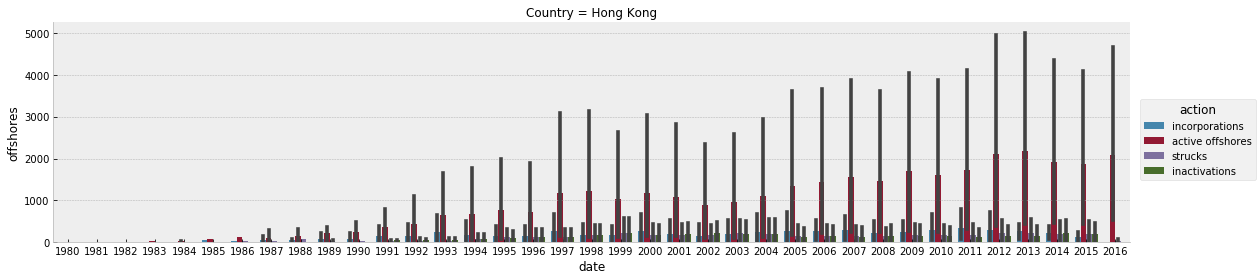

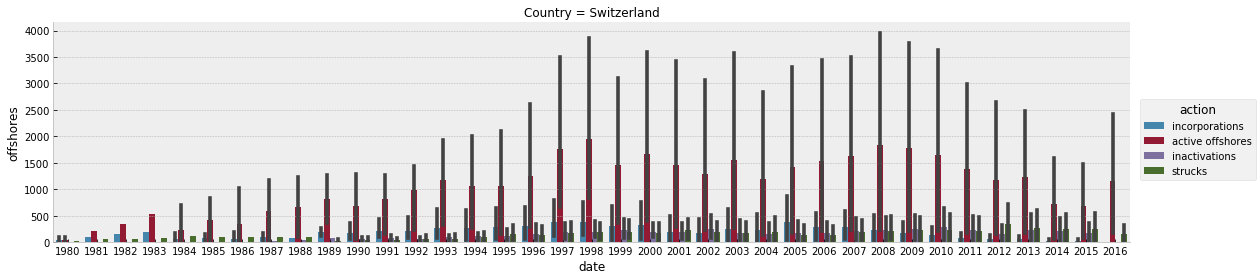

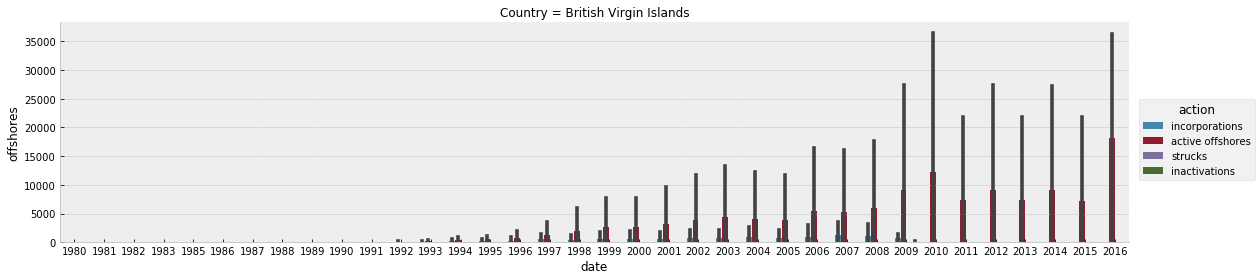

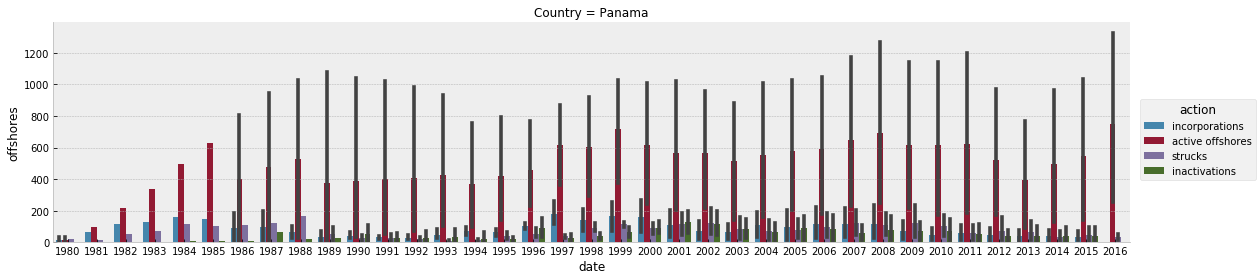

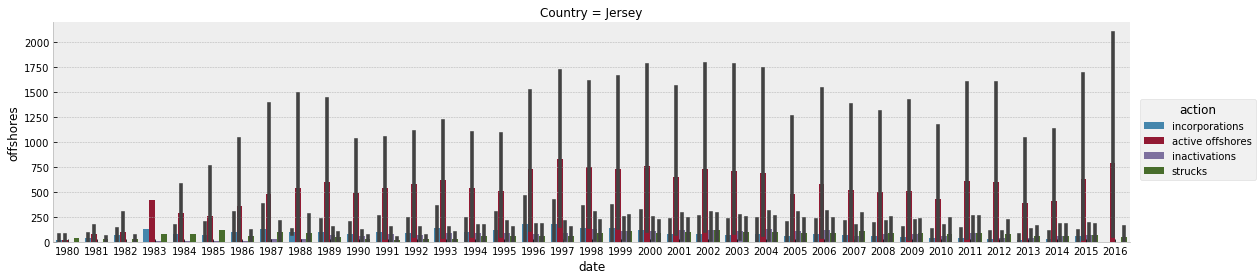

In [98]:
visualizer.visualize_countries_situation(countries_frame, divide_by='Country',vis_number=5)

## Visualizing situation in the most involved jurisdictions
Here we are visualizing the same results with a focus on two jurisdictions, Panama and the British Virgin Islands.
___
#### British Virgin Islands


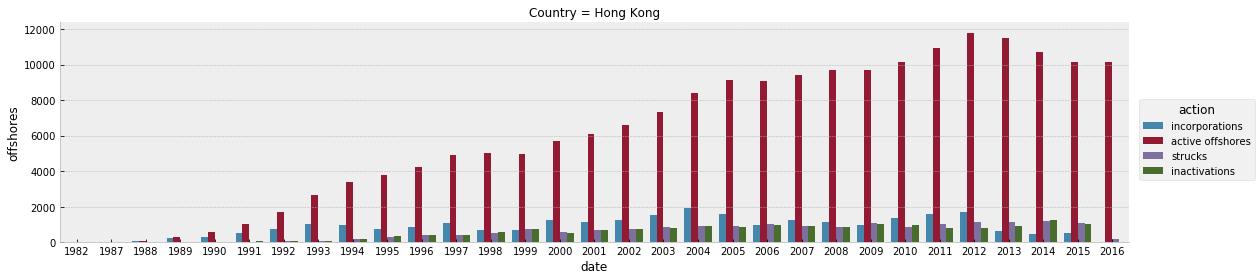

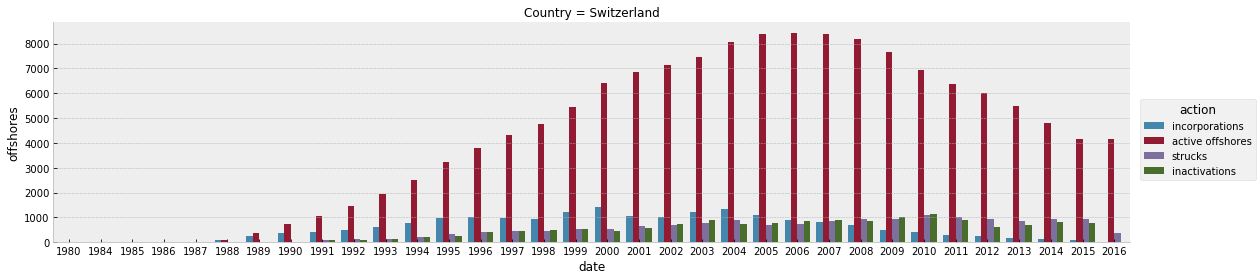

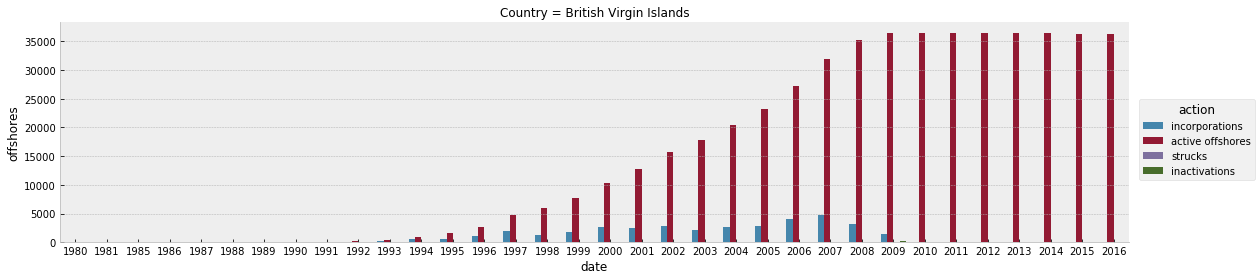

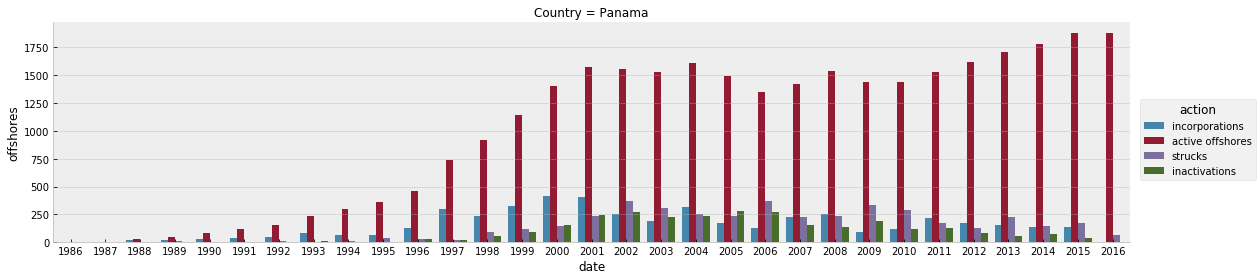

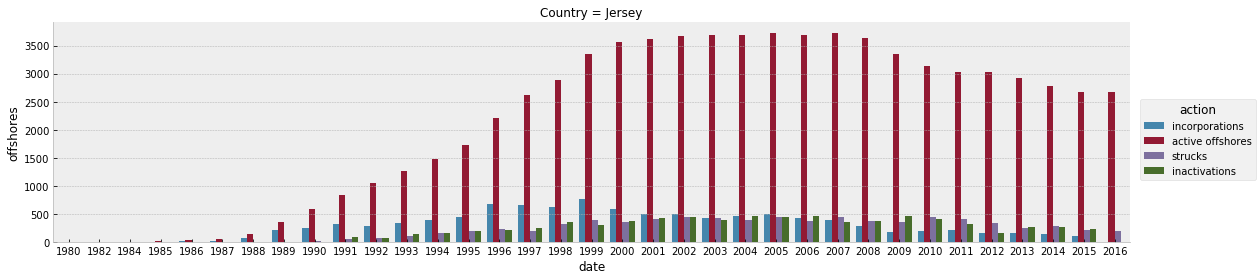

In [99]:
visualizer.visualize_countries_situation(countries_frame, divide_by='Country',vis_number=5,selected_jurisdiction='British Virgin Islands')

#### Panama

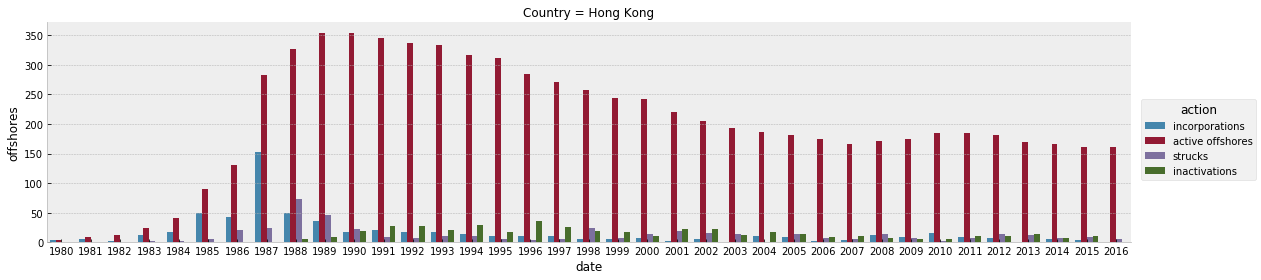

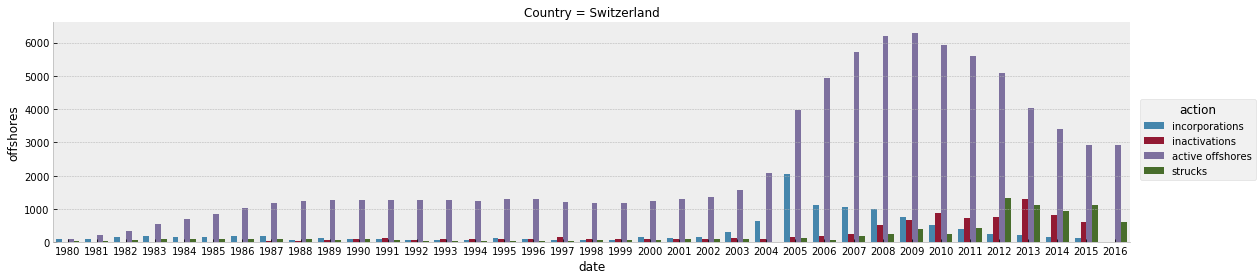

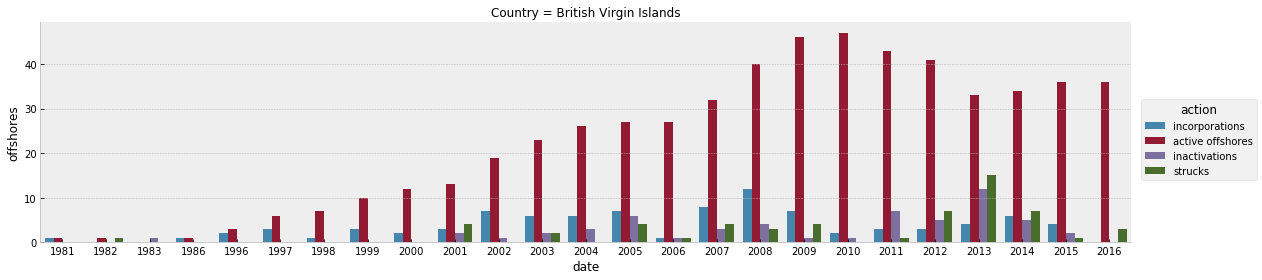

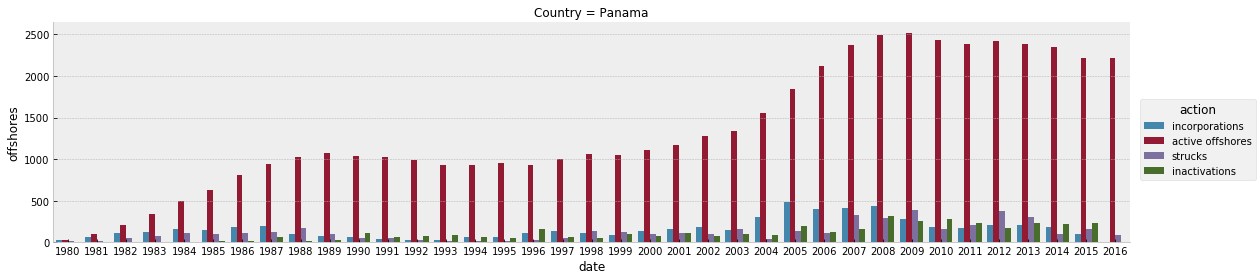

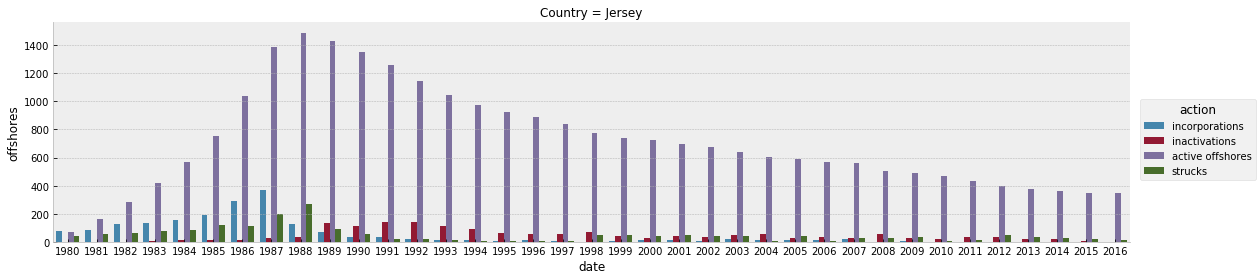

In [100]:
visualizer.visualize_countries_situation(countries_frame,vis_number=5, divide_by='Country',selected_jurisdiction='Panama')